# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [93]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
import matplotlib.pyplot as plt

In [94]:
#firstly we are opening the yearinfo.json file and assigning yearinfo.json file to the variable.
file = open('/content/drive/MyDrive/yearinfo.json')
yearinfo = json.load(file)
yearinfo

{'2010': [{'band_singer': ['Kesha'],
   'ranking': 1,
   'song': ['/wiki/Tik_Tok_(song)'],
   'songurl': ['Tik Tok (song)'],
   'titletext': '"Tik Tok"',
   'url': ['/wiki/Kesha']},
  {'band_singer': ['Lady Antebellum'],
   'ranking': 2,
   'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'],
   'songurl': ['Need You Now (Lady Antebellum song)'],
   'titletext': '"Need You Now"',
   'url': ['/wiki/Lady_Antebellum']},
  {'band_singer': ['Train (band)'],
   'ranking': 3,
   'song': ['/wiki/Hey,_Soul_Sister'],
   'songurl': ['Hey, Soul Sister'],
   'titletext': '"Hey, Soul Sister"',
   'url': ['/wiki/Train_(band)']},
  {'band_singer': ['Katy Perry', 'Snoop Dogg'],
   'ranking': 4,
   'song': ['/wiki/California_Gurls'],
   'songurl': ['California Gurls'],
   'titletext': '"California Gurls"',
   'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']},
  {'band_singer': ['Usher (musician)', 'Will.i.am'],
   'ranking': 5,
   'song': ['/wiki/OMG_(Usher_song)'],
   'songurl': ['OMG (Usher song)'],


In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [96]:
#finding the total number of year 
yearinfo.keys()

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [97]:
#finding number of songs in 2010
len(yearinfo['2010'])

100

In [98]:
#it will show the values of each particular year.
yearinfo.items()

dict_items([('2010', [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Wi

In [99]:
#finding the column name of the year 2010 using keys.
yearinfo['2010'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [100]:
#creating column for dataframe
column = list(yearinfo['2010'][0].keys())+(['year'])
column

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

In [101]:
#adding all the data point in the data_list
data_list = []
for key, value in yearinfo.items():
    for i in value:
        temp = list(i.values())+[key]
        data_list.append(temp)
df = pd.DataFrame(data_list,columns=column)#creating dataframe
df.tail()

band_singer  \
1195                     [Lainey Wilson]   
1196                          [BRS Kash]   
1197                          [Rod Wave]   
1198  [Chase Rice, Florida Georgia Line]   
1199                    [Rauw Alejandro]   

                                               song  \
1195               [/wiki/Things_a_Man_Oughta_Know]   
1196                  [/wiki/Throat_Baby_(Go_Baby)]   
1197                       [/wiki/Tombstone_(song)]   
1198  [/wiki/Drinkin%27_Beer._Talkin%27_God._Amen.]   
1199                             [/wiki/Todo_de_Ti]   

                                  songurl  ranking  \
1195           [Things a Man Oughta Know]       96   
1196              [Throat Baby (Go Baby)]       97   
1197                   [Tombstone (song)]       98   
1198  [Drinkin' Beer. Talkin' God. Amen.]       99   
1199                         [Todo de Ti]      100   

                                titletext  \
1195           "Things a Man Oughta Know"   
1196              "Throat Baby (Go Baby)"   
1197                          "Tombstone"   
1198  "Drinkin' Beer. Talkin' God. Amen."   
1199                         "Todo de Ti"   

                                                 url  year  
1195                           [/wiki/Lainey_Wilson]  2021  
1196                                [/wiki/BRS_Kash]  2021  
1197                                [/wiki/Rod_Wave]  2021  
1198  [/wiki/Chase_Rice, /wiki/Florida_Georgia_Line]  2021  
1199                          [/wiki/Rauw_Alejandro]  2021

In [102]:
df.shape

(1200, 7)

In [103]:
#check datatype
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [104]:
#check whether there is no empty value or not.
df.count()

band_singer    1200
song           1200
songurl        1200
ranking        1200
titletext      1200
url            1200
year           1200
dtype: int64

In [105]:
#function to enter the datapoint in the formated value in the dataset
def fetch_list_value(list_name):
    value = list_name[0]
    return value
#datapoints which need to be entered in proper formated value
df['band_singer'] = df.band_singer.map(fetch_list_value)
df['song'] = df.song.map(fetch_list_value)
df['songurl'] = df.songurl.map(fetch_list_value)
df['url'] = df.url.map(fetch_list_value)

In [106]:
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [107]:
df.value_counts(subset=['band_singer'])[:20]

band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
Katy Perry          14
Chris Brown         14
Justin Bieber       14
Post Malone         13
Ed Sheeran          13
Imagine Dragons     12
Shawn Mendes        11
Bruno Mars          11
Adele               11
Lady Gaga           11
Cardi B             10
Usher (musician)    10
Calvin Harris       10
Jason Derulo        10
dtype: int64

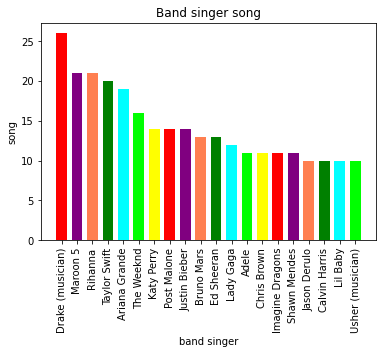

In [108]:
x = y.index
y = df.band_singer.value_counts()[:20]
c=['red','purple', 'coral','green','aqua','lime','yellow','red','purple', 'coral','green','aqua','lime','yellow','red','purple', 'coral','green','aqua','lime']
plt.bar(x,y, width=0.7, color=c)
plt.title('Band singer song')
plt.xticks(rotation=90)
plt.xlabel('band singer')
plt.ylabel('song')
plt.show()

**Question: Who is the most profilic singer?**


### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [109]:
#adding score column and datapoint to it
df['score'] = [101-i for i in df['ranking']]
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

In [110]:
#checking datatype 
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
score           int64
dtype: object

In [111]:
dis_singre_score = {}
for singer, songs in df.groupby('band_singer'):
    dis_singre_score[singer] = songs.score.sum()
dis_singre_score

{'2 Chainz': 49,
 '21 Savage': 112,
 '24kGoldn': 151,
 '3OH!3': 28,
 '5 Seconds of Summer': 156,
 '6ix9ine': 115,
 'A Boogie wit da Hoodie': 99,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 657,
 'Alessia Cara': 140,
 'Alex Clare': 71,
 'Alicia Keys': 77,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 1104,
 'Arizona Zervas': 85,
 'Ava Max': 106,
 'Avicii': 202,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 244,
 'BRS Kash': 4,
 'BTS': 213,
 'Baauer': 97,
 'Bad Bunny': 148,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 86,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 108,
 'Beyoncé': 172,
 'Big Sean': 178,
 'Billie Eilish': 380,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 78,
 'Blake Shelton': 200,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,


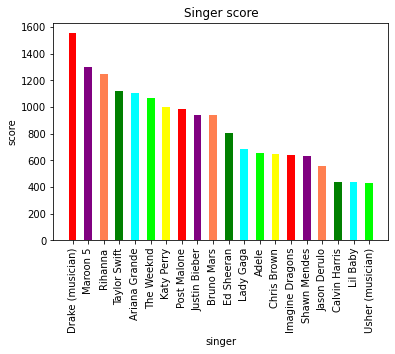

In [112]:
y = pd.Series(data=dis_singre_score, index=y.keys())[:20].sort_values(ascending=False)
x = y.index
c=['red','purple', 'coral','green','aqua','lime','yellow','red','purple', 'coral','green','aqua','lime','yellow','red','purple', 'coral','green','aqua','lime']
plt.bar(x,y,width=0.5,color=c)
plt.title('Singer score')
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

Which singer of what song got highest ranked in each year?

In [113]:
#grouping by year and printing most highest ranked singer in each year
for key, value in df.groupby('year'):
    highestdf = value[value.ranking == value.ranking.max()]
    print(highestdf.year, highestdf.band_singer)

99    2010
Name: year, dtype: object 99    Jerrod Niemann
Name: band_singer, dtype: object
199    2011
Name: year, dtype: object 199    Big Sean
Name: band_singer, dtype: object
299    2012
Name: year, dtype: object 299    Linkin Park
Name: band_singer, dtype: object
399    2013
Name: year, dtype: object 399    Paramore
Name: band_singer, dtype: object
499    2014
Name: year, dtype: object 499    Miley Cyrus
Name: band_singer, dtype: object
599    2015
Name: year, dtype: object 599    Calvin Harris
Name: band_singer, dtype: object
699    2016
Name: year, dtype: object 699    One Direction
Name: band_singer, dtype: object
799    2017
Name: year, dtype: object 799    Keith Urban
Name: band_singer, dtype: object
899    2018
Name: year, dtype: object 899    Imagine Dragons
Name: band_singer, dtype: object
999    2019
Name: year, dtype: object 999    Juice Wrld
Name: band_singer, dtype: object
1099    2020
Name: year, dtype: object 1099    NLE Choppa
Name: band_singer, dtype: object
1199   

## SUBMISSION DATE: 2nd April 2022 